<a href="https://colab.research.google.com/github/liams-code/liams-coding/blob/main/upbitAI_stx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 8.1 MB/s 


In [2]:
import pyupbit

In [25]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-STX", interval="minute240")
df

,open,high,low,close,volume,value
2022-01-11 05:00:00,2405.0,2445.0,2390.0,2430.0,1.262278e+06,3.053590e+09
2022-01-11 09:00:00,2430.0,2435.0,2340.0,2415.0,4.094131e+06,9.794767e+09
2022-01-11 13:00:00,2415.0,2420.0,2305.0,2365.0,4.985610e+06,1.171633e+10
2022-01-11 17:00:00,2355.0,2385.0,2285.0,2335.0,3.168034e+06,7.367765e+09
2022-01-11 21:00:00,2330.0,2375.0,2300.0,2360.0,3.208024e+06,7.493689e+09
...,...,...,...,...,...,...
2022-02-12 17:00:00,1780.0,1815.0,1765.0,1810.0,1.340233e+06,2.398593e+09
2022-02-12 21:00:00,1805.0,1820.0,1745.0,1785.0,1.954861e+06,3.473595e+09
2022-02-13 01:00:00,1790.0,1840.0,1780.0,1815.0,1.755124e+06,3.194005e+09
2022-02-13 05:00:00,1815.0,1890.0,1780.0,1875.0,2.637535e+06,4.868182e+09


In [26]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-01-11 05:00:00,2430.0
1,2022-01-11 09:00:00,2415.0
2,2022-01-11 13:00:00,2365.0
3,2022-01-11 17:00:00,2335.0
4,2022-01-11 21:00:00,2360.0
...,...,...
195,2022-02-12 17:00:00,1810.0
196,2022-02-12 21:00:00,1785.0
197,2022-02-13 01:00:00,1815.0
198,2022-02-13 05:00:00,1875.0


In [27]:
#prophet 불러옴
from fbprophet import Prophet

In [28]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [33]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=240, freq='H')
forecast = model.predict(future)

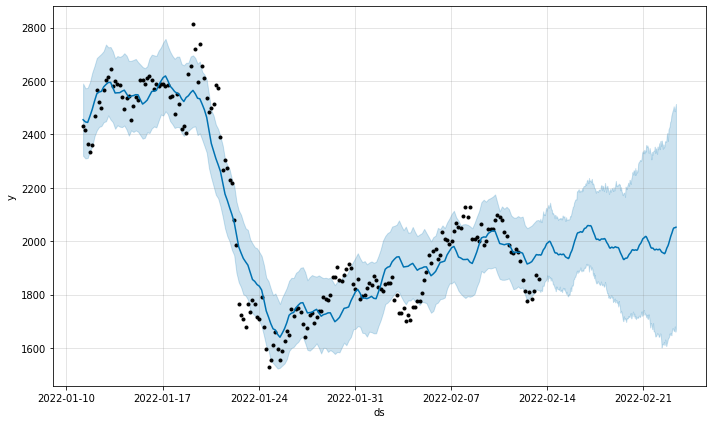

In [34]:
#그래프1
fig1 = model.plot(forecast)

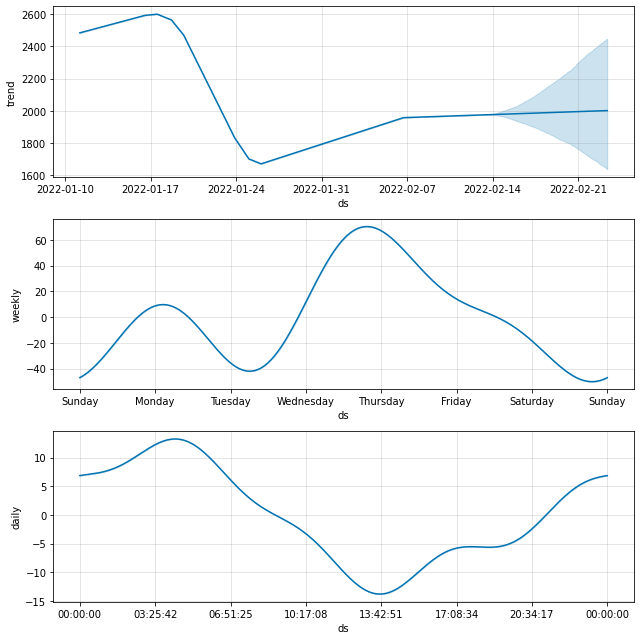

In [35]:
#그래프2
fig2 = model.plot_components(forecast)

In [ ]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-BTC")
nowValue

51695000.0

In [ ]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

50753903.374362424

In [ ]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  51695000.0
종가의 가격:  50753903.374362424


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-04 07:00:00,4.496679e+07,4.460543e+07,4.564148e+07,4.496679e+07,4.496679e+07,150946.585721,150946.585721,150946.585721,150946.585721,150946.585721,150946.585721,0.0,0.0,0.0,4.511773e+07
1,2022-02-04 08:00:00,4.514416e+07,4.478183e+07,4.584706e+07,4.514416e+07,4.514416e+07,153957.621890,153957.621890,153957.621890,153957.621890,153957.621890,153957.621890,0.0,0.0,0.0,4.529811e+07
2,2022-02-04 09:00:00,4.532153e+07,4.489016e+07,4.593816e+07,4.532153e+07,4.532153e+07,99696.232871,99696.232871,99696.232871,99696.232871,99696.232871,99696.232871,0.0,0.0,0.0,4.542123e+07
3,2022-02-04 10:00:00,4.549890e+07,4.499286e+07,4.602109e+07,4.549890e+07,4.549890e+07,10315.176947,10315.176947,10315.176947,10315.176947,10315.176947,10315.176947,0.0,0.0,0.0,4.550922e+07
4,2022-02-04 11:00:00,4.567627e+07,4.510517e+07,4.613285e+07,4.567627e+07,4.567627e+07,-60657.139979,-60657.139979,-60657.139979,-60657.139979,-60657.139979,-60657.139979,0.0,0.0,0.0,4.561562e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-02-13 10:00:00,5.059853e+07,4.969359e+07,5.139930e+07,4.983892e+07,5.125961e+07,10315.176944,10315.176944,10315.176944,10315.176944,10315.176944,10315.176944,0.0,0.0,0.0,5.060885e+07
220,2022-02-13 11:00:00,5.054285e+07,4.952870e+07,5.142746e+07,4.973050e+07,5.124953e+07,-60657.139979,-60657.139979,-60657.139979,-60657.139979,-60657.139979,-60657.139979,0.0,0.0,0.0,5.048220e+07
221,2022-02-13 12:00:00,5.048718e+07,4.937328e+07,5.137162e+07,4.961502e+07,5.124411e+07,-78972.424570,-78972.424570,-78972.424570,-78972.424570,-78972.424570,-78972.424570,0.0,0.0,0.0,5.040820e+07
222,2022-02-13 13:00:00,5.043150e+07,4.928401e+07,5.139580e+07,4.950065e+07,5.124558e+07,-58790.080201,-58790.080201,-58790.080201,-58790.080201,-58790.080201,-58790.080201,0.0,0.0,0.0,5.037271e+07
